# DD2437 - Deep Belief Nets
Mathis Pernin, Tristan Perrot, Romain Darous.

In [1]:
from util import *
from rbm import RestrictedBoltzmannMachine 
from dbn import DeepBeliefNet
image_size = [28,28]
train_imgs,train_lbls,test_imgs,test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)

### 4.1. RBM for recognising MNIST images

In [2]:
"""''' restricted boltzmann machine '''

print ("\nStarting a Restricted Boltzmann Machine..")

rbm = RestrictedBoltzmannMachine(ndim_visible=image_size[0]*image_size[1],
                                    ndim_hidden=200,
                                    is_bottom=True,
                                    image_size=image_size,
                                    is_top=False,
                                    n_labels=10,
                                    batch_size=10
)

rbm.cd1(visible_trainset=train_imgs, n_iterations=20)"""

'\'\'\' restricted boltzmann machine \'\'\'\n\nprint ("\nStarting a Restricted Boltzmann Machine..")\n\nrbm = RestrictedBoltzmannMachine(ndim_visible=image_size[0]*image_size[1],\n                                    ndim_hidden=200,\n                                    is_bottom=True,\n                                    image_size=image_size,\n                                    is_top=False,\n                                    n_labels=10,\n                                    batch_size=10\n)\n\nrbm.cd1(visible_trainset=train_imgs, n_iterations=20)'

### 4.2. Towards deep networks - greedy layer-wise pretraining

In [3]:
import time
start = time.time()
''' deep- belief net '''

print ("\nStarting a Deep Belief Net..")

dbn = DeepBeliefNet(sizes={"vis":image_size[0]*image_size[1], "hid":500, "pen":500, "top":2000, "lbl":10},
                    image_size=image_size,
                    n_labels=10,
                    batch_size=20
)

''' greedy layer-wise training '''
dbn.train_greedylayerwise(vis_trainset=train_imgs, lbl_trainset=train_lbls, n_iterations=15)


Starting a Deep Belief Net..
loaded rbm[vis--hid] from trained_rbm
loaded rbm[hid--pen] from trained_rbm
loaded rbm[pen+lbl--top] from trained_rbm


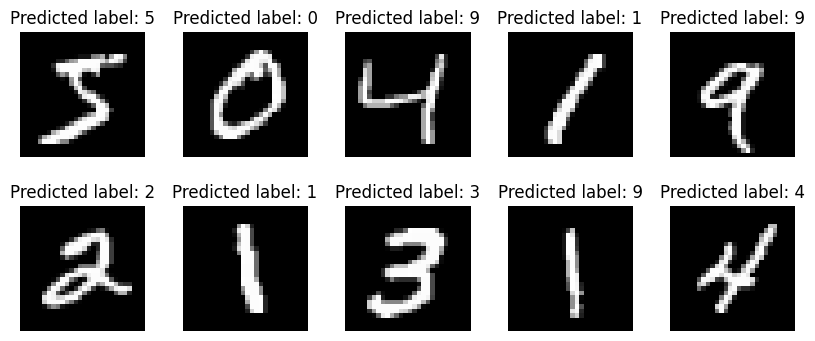

accuracy = 69.47%


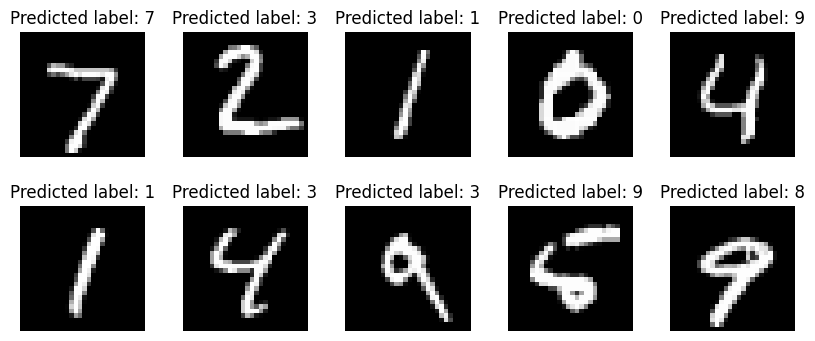

accuracy = 69.95%


In [4]:
dbn.recognize(train_imgs, train_lbls)

dbn.recognize(test_imgs, test_lbls)

Training duration :  155.79175186157227


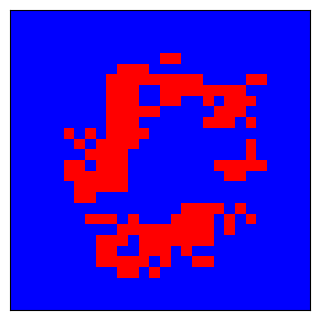

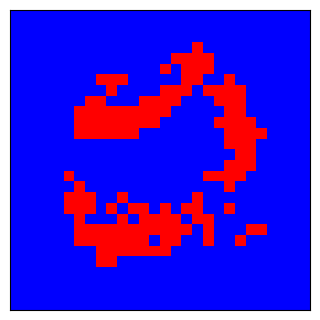

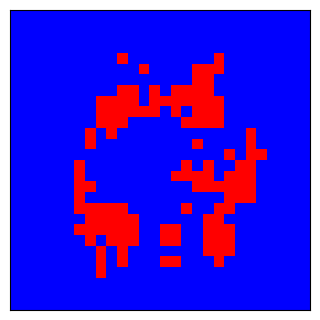

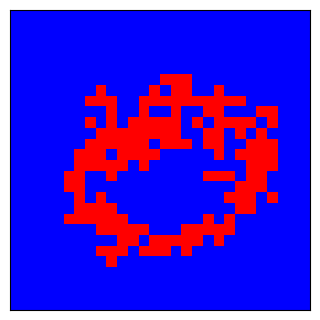

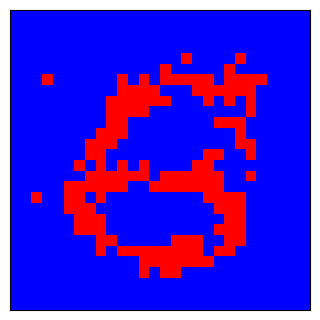

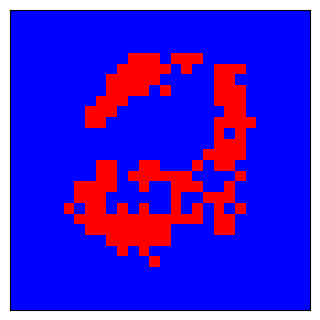

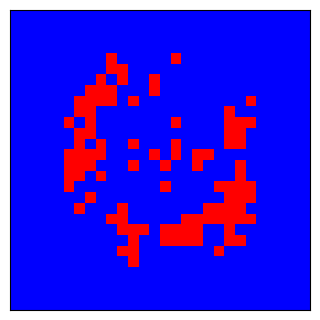

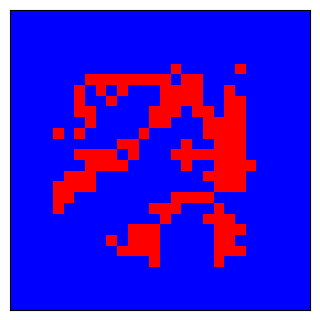

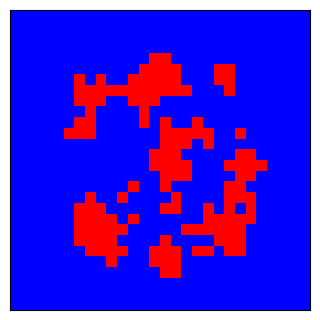

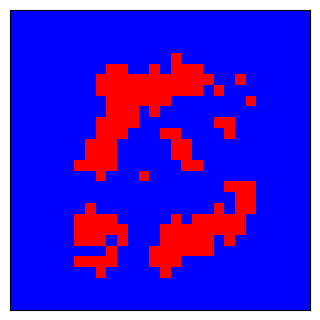

In [5]:
for digit in range(10):
    digit_1hot = np.zeros(shape=(1,10))
    digit_1hot[0,digit] = 1
    dbn.generate(digit_1hot, name="rbms")

end = time.time()
print("Training duration : ", end - start)